ПРОЕКТНАЯ РАБОТА

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
Описание услуг

Оператор предоставляет два основных типа услуг: 
Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны такие услуги:
Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.
Описание данных

Данные состоят из файлов, полученных из разных источников:

contract_new.csv — информация о договоре;

personal_new.csv — персональные данные клиента;

internet_new.csv — информация об интернет-услугах;

phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Цель проекта:

    спрогнозировать, уйдёт клиент из компании «Ниединогоразрыва.ком» или нет,
    
    определить факторы, которые влияют на отток клиентов,
    
    достичь необходимой метрики

Содержание

1  Подготовка данных

1.1. Откроем файлы

1.2 Проверим и изучим признаки

Вывод

2  Исследование задачи

2.1 Проведем исследовательский анализ данных

2.2 Построим графики

2.3 Разобъем данные на обучающую,валидационную и тестовую выборки 

Вывод

3  Обучение модели 

3.1 Обучим модель и сделаем предсказания.

3.2 Сравним результаты и выберем наилучшую модель

Вывод

4  Тестирование модели

4.1 Проведение тестирования на наилучшей модели

4.2 Анализ результатов

Вывод

5 Проверка на случайной модели

5.1 Проверка на dummy модели

5.2 Анализ релультатов 

Вывод

Общий вывод

1  Подготовка данных

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

!pip install phik
import phik

In [2]:
#загрузим файл
df_contract=pd.read_csv('/datasets/contract_new.csv')
df_personal=pd.read_csv('/datasets/personal_new.csv')
df_internet=pd.read_csv('/datasets/internet_new.csv')
df_phone=pd.read_csv('/datasets/phone_new.csv')

In [3]:
#посмотрим первые 10 строк датасетов
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


In [4]:
#посмотрим первые 10 строк датасетов
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [5]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [6]:
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Мы видим, что все таблицы имеют общий признак (идентификатор) 'customerID'

In [7]:
#соединим все таблицы в одну по признаку customerID для последующего анализа
df = df_contract.merge(df_personal, on='customerID', how='left')
df = df.merge(df_internet, on='customerID', how='left')
df = df.merge(df_phone, on='customerID', how='left')

In [8]:
df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


2  Исследование задачи

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Мы видим, что у нас нет информации по некоторым клиентам в признаках, относящихся к интернету и телефону, поэтому заменим эти значения на unknown ('неизвестно')

In [10]:
df['InternetService'].fillna('unknown', inplace=True)
df['OnlineSecurity'].fillna('unknown', inplace=True)
df['OnlineBackup'].fillna('unknown', inplace=True)
df['DeviceProtection'].fillna('unknown', inplace=True)
df['TechSupport'].fillna('unknown', inplace=True)
df['StreamingTV'].fillna('unknown', inplace=True)
df['StreamingMovies'].fillna('unknown', inplace=True) 
df['MultipleLines'].fillna('unknown', inplace=True)

При изменении типа данных в столбце 'TotalCharges' возникала ошибка, которая говорила о наличии пропущенных значений в столбце, не смотря на то, что количество значений по данному столбцу 7043 говорит об отсутствии таких значений,то мы пришли к выводу, что в данном столбце могут быть пустые значение (пробелы)

In [11]:
#проверим
df[df['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,unknown
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,unknown
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Действительно такие незаполненные значения имеются, но их немного, поэтому примем решение удалить их.

In [12]:
#удаляем
df=df[df['TotalCharges'] != ' ']

In [13]:
#изменим тип данных столбца 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
#проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


In [15]:
#изменим тип данных признаков BeginDate на datatime
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

Признак EndDate - является целевым признаком, то есть если значение 'No' - значит клиент остался с оператором, если в значениях заполнена дата, значит клиент ушел.
Поэтому создадим столбец с численные целевым значением

In [16]:
df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,unknown
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,unknown
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,unknown
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


In [17]:
df.loc[df['EndDate'] == 'No', 'Churn'] = 0
df.loc[df['EndDate'] != 'No', 'Churn'] = 1

In [18]:
df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,unknown,0.0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0.0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,unknown,0.0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0.0
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0.0
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0.0
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,...,No,DSL,Yes,No,No,No,No,No,unknown,0.0
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,...,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0.0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,...,Yes,DSL,Yes,Yes,No,No,No,No,No,1.0


In [19]:
#в условии задачи мы знаем, что таблица выгружена 1 февраля 2020, поэтому значение 'No' признака EndDate можем заменить на эту дату
df['EndDate']=df['EndDate'].replace('No','2020-02-01')

In [20]:
df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,unknown,0.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0.0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,unknown,0.0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0.0
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0.0
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0.0
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,Female,0,...,No,DSL,Yes,No,No,No,No,No,unknown,0.0
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,...,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0.0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,...,Yes,DSL,Yes,Yes,No,No,No,No,No,1.0


Значения 'No' в столбце 'EndDate' успешно изменены на дату выгрузки таблицы.

In [21]:
#изменим тип данных признаков EndDate на datatime
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   7032 non-null   object        
 13  OnlineSecurity    7032 non-null   object        
 14  OnlineBackup      7032 n

Типы данных изменены на дататайм

In [23]:
#проверим имеются ли дубликаты
df.duplicated().sum()

0

Дубликаты отсутствуют

In [24]:
#посмотрим размер датасета
df.shape

(7032, 21)

Таблица имеет 21 столбец и 7032 строки

In [25]:
#посмотрим на распределение по полу
df.groupby('gender')['customerID'].count()

gender
Female    3483
Male      3549
Name: customerID, dtype: int64

Среди покупателей количество женщин и мужчин почти одинаковое

array([[<AxesSubplot:title={'center':'BeginDate'}>,
        <AxesSubplot:title={'center':'EndDate'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Churn'}>]], dtype=object)

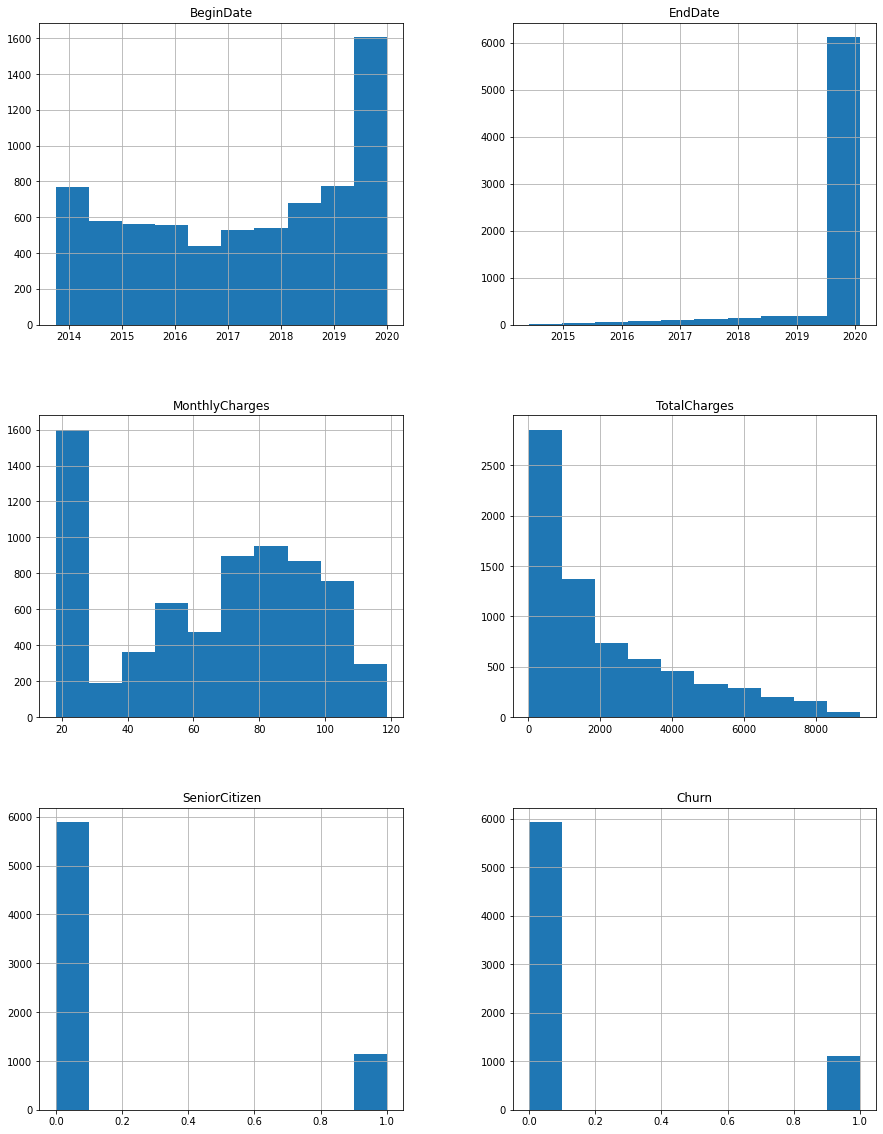

In [26]:
df.hist(figsize=(15,20))

По графикам мы видим, что в 2020 года появилось наибольшее количество пользователей, c 2015 по 2019 год количество клиентов, отказавшихся от услуг, постепенно увеличивалось (2020 - не учитываем,так как это дата выгрузки базы данных, ежемесечные платы за услуги наилбольшие от 20 до 30 единиц. 

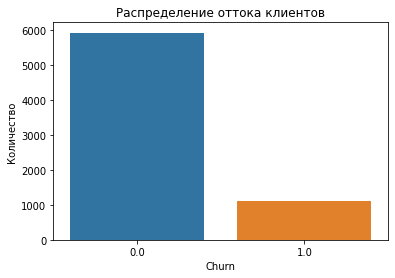

In [27]:
sns.countplot(x='Churn', data=df)
plt.xlabel('Сhurn')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов')
plt.show()

Более 1000 человек отказались от услуг из почти 7043 пользователей.

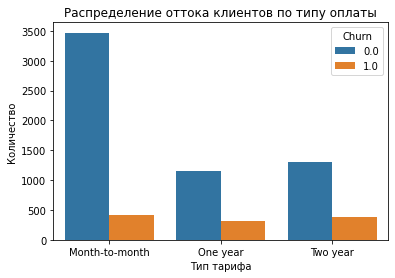

In [28]:
sns.countplot(x='Type', hue='Churn', data=df)
plt.xlabel('Тип тарифа')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов по типу оплаты')
plt.show()

Тариф не вляет на отток клиентов, так как в каждом тарифе мы наблюдаем плюс минус одинаковое количество пользователей, отказавшихся от услуг.

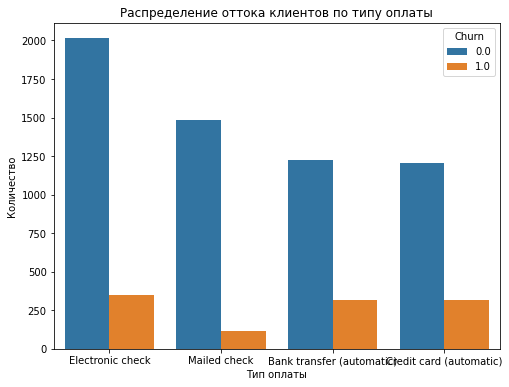

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xlabel('Тип оплаты')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов по типу оплаты')
plt.show()

Наименьшее количество пользователей c методом оплату 'Mailed Check' ушли от оператора.

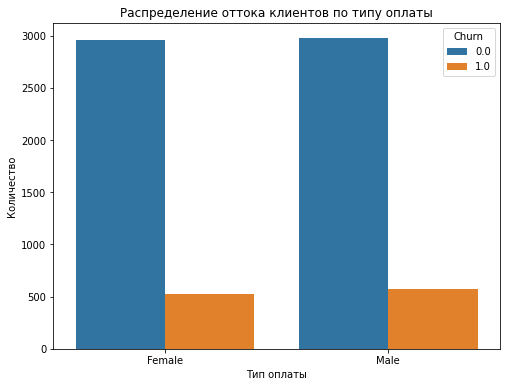

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.xlabel('Тип оплаты')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов по типу оплаты')
plt.show()

Одинаково уходят как мужчины, так и женщины.

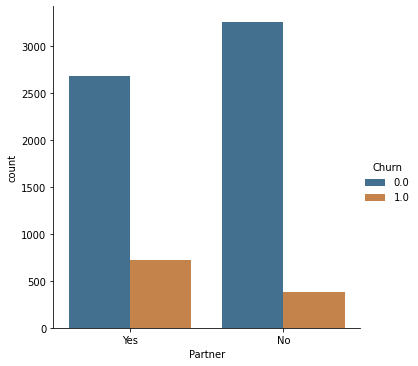

In [31]:
sns.catplot(data=df, hue='Churn', x='Partner', kind='count', saturation=0.5)


Пользователи, у которых нет супруга меньше уходят от оператора. Можно предположить, что семейные люди более экономные и чаще рассматривают, например, предложения конкурентов.

In [32]:
#после объединения таблиц признак customerID нам больше не нужен, поэтому удалим его
df=df.drop('customerID', axis=1)

In [33]:
df['time_with_company_days']= (df['EndDate'] - df['BeginDate']).dt.days

In [34]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,time_with_company_days
0,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,...,DSL,No,Yes,No,No,No,No,unknown,0.0,31
1,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,...,DSL,Yes,No,Yes,No,No,No,No,0.0,1036
2,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,...,DSL,Yes,Yes,No,No,No,No,No,0.0,123
3,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,...,DSL,Yes,No,Yes,Yes,No,No,unknown,0.0,1371
4,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,...,Fiber optic,No,No,No,No,No,No,No,0.0,153


In [35]:
df=df.drop('EndDate', axis=1)
df=df.drop('BeginDate', axis=1)

Визуализация и анализ всех признаков


In [36]:
categorical_columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']

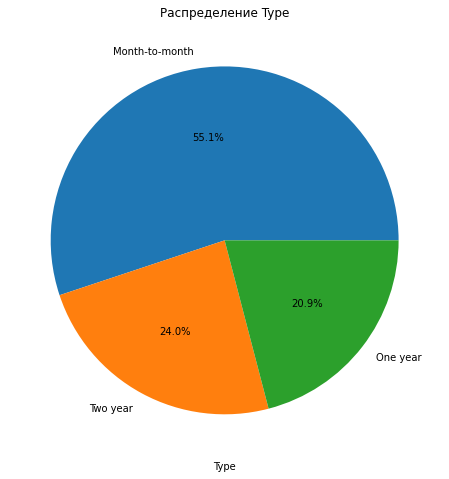

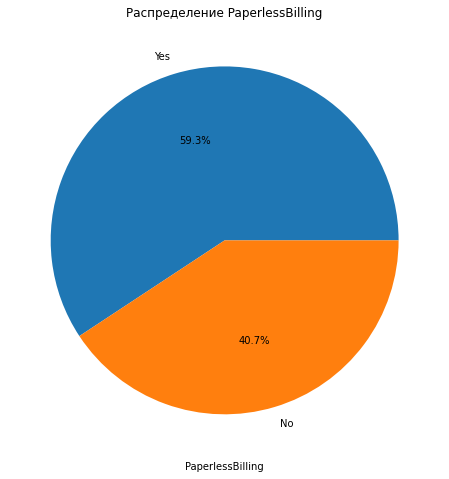

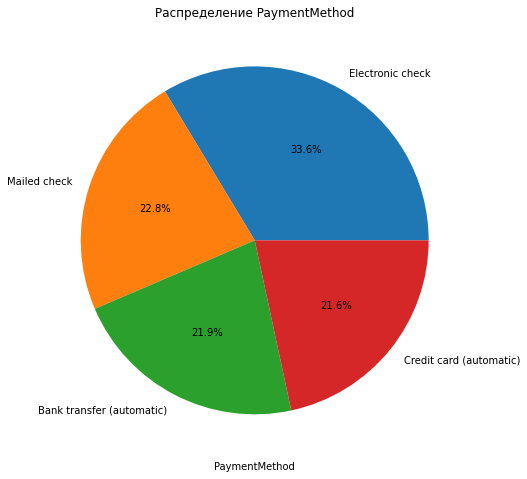

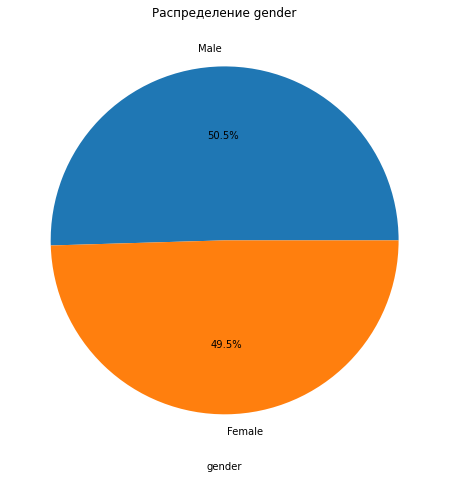

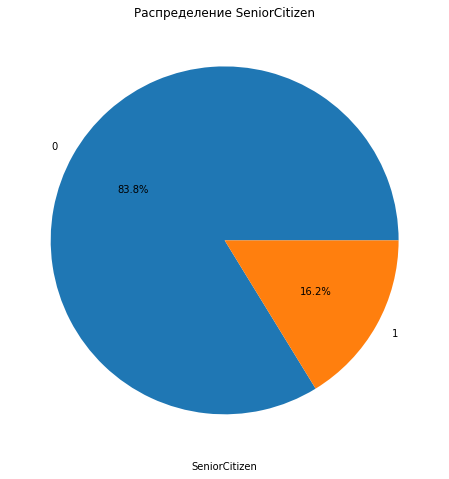

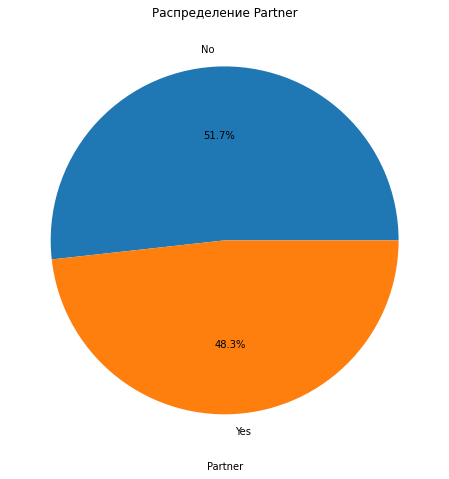

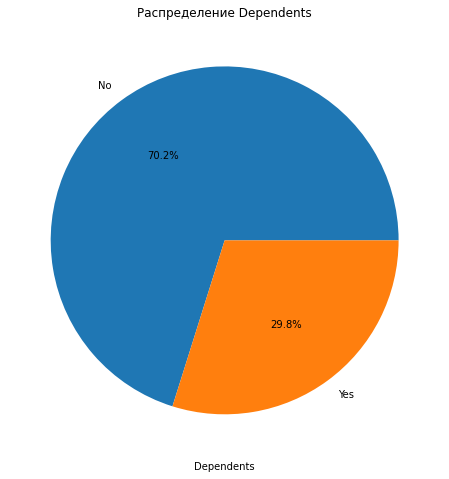

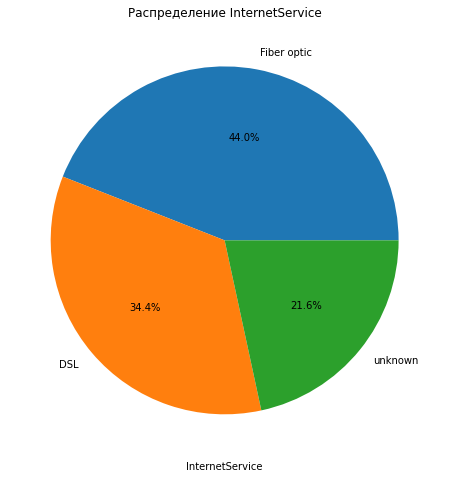

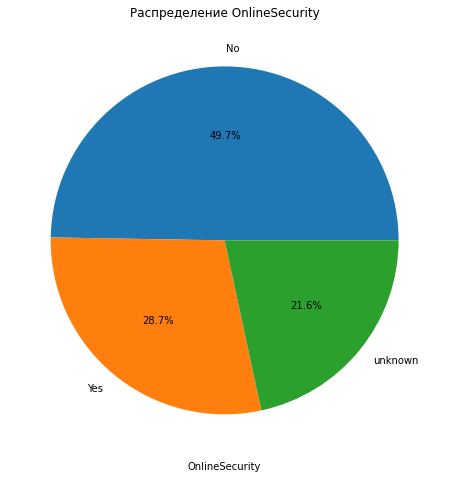

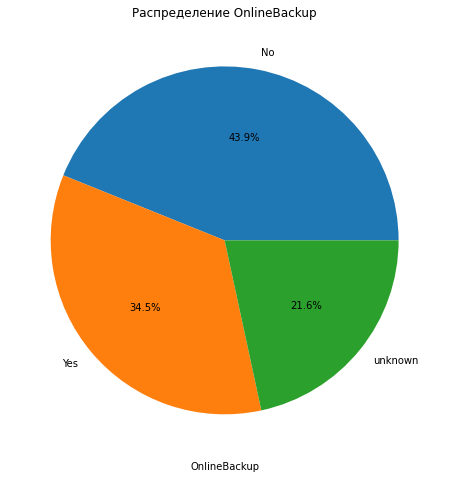

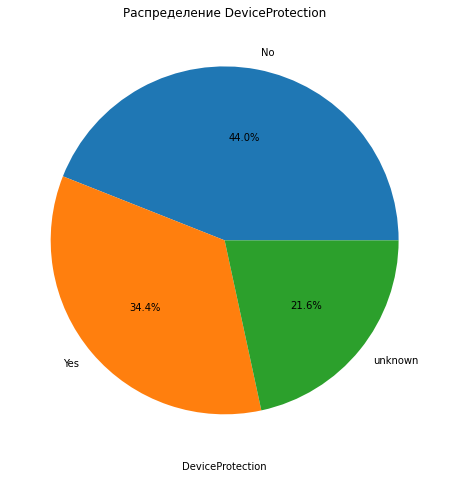

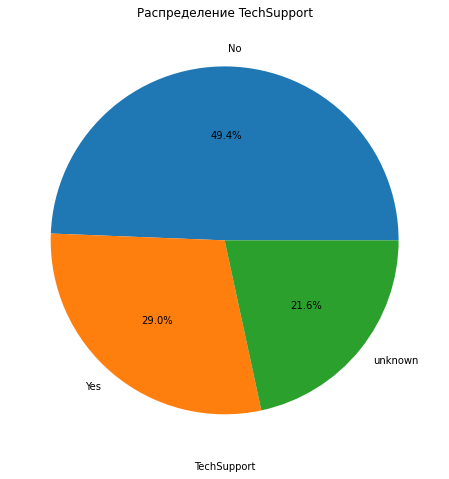

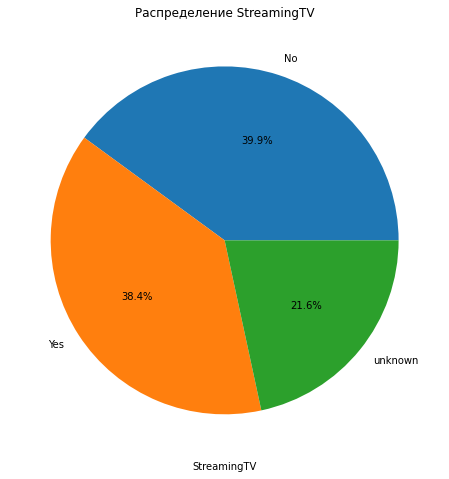

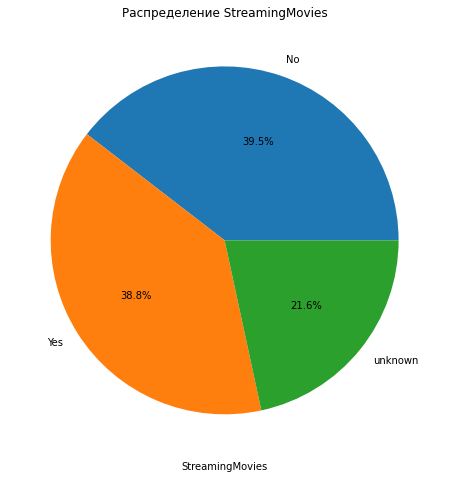

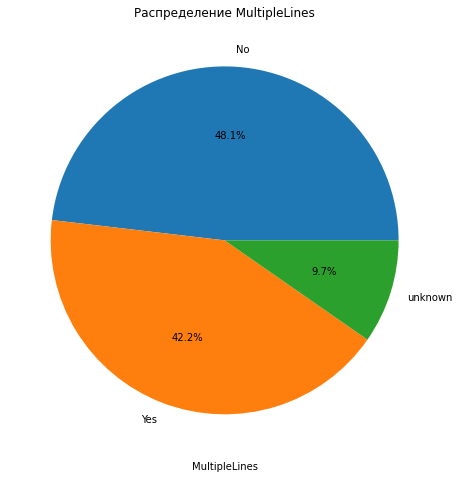

In [37]:
for column in categorical_columns:
    plt.figure(figsize=(10, 8))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.xlabel(column)
    plt.ylabel('')
    plt.title(f'Распределение {column}')
    plt.show()

Наибольше количество пользователей используют 
- тариф с оплатой месяц за месяцем
-электронный платежный документ
-способ оплаты чаще электронный чек, далее чек на эмейл

Распределние пользователей по полу почти одинаковое.

Большинство пользователей не имеют пенсионного статуса, имеют только 16.2%

Распределние по наличию супруга(и) почти одинаковое.

У 70% имеются иждевенцы.

Большинство использует услуги интернета.

Наличие возможности ведения параллельных звонков используют только 42% пользователей.

Анализ на мультиколлинеарность

In [38]:
columns_to_remove = ['Churn', 'SeniorCitizen']
df_without_columns = df.drop(columns=columns_to_remove)

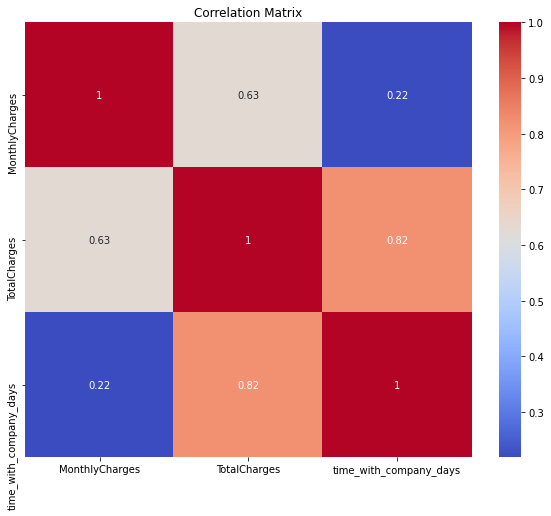

In [39]:
#построим матрицу корреляции признаков
corr_matrix = df_without_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Высокая корреляция между общими тратами на услуги и временем, проведенным в компании, но это логично, чем дольше в компании, тем больше денег уплачено.
Так же имеется зависимость ежемесечных и общих трат, очевидно, чем больше ежемесячные траты, тем больше общие.

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn', 'time_with_company_days']


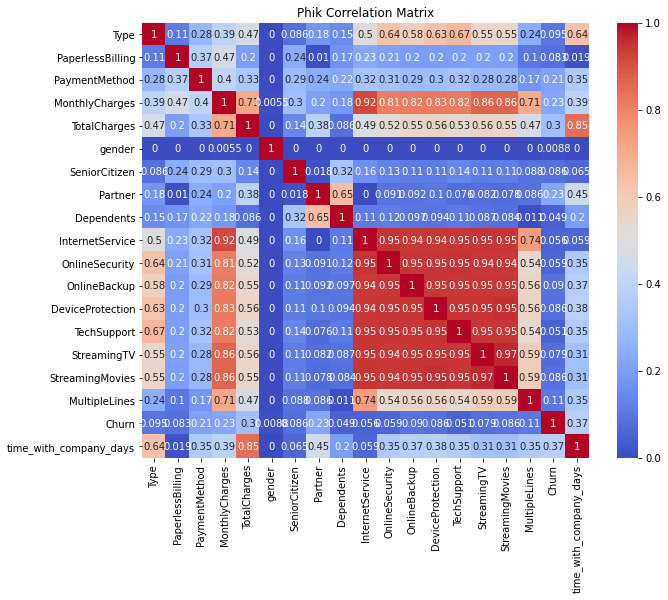

In [40]:
#для смешанных типов данных используем библиотеку phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Matrix')
plt.show()

Проанализировав,полученную матрицу, выявлена высока корреляция между услугами интернета, онлайн безопасностью, защитой, поддержкой, подпиской на тв и фильмы и ежемесячными тратами, самая высокая между InternetService. Так же имеется замисимость этих признаков к типу тарифа. 

В том числе, новый признак 'длительность клиента в компании' имеет высокую корреляцию с общими издержками и типом, использованного тарифа.

Анализ на дисбаланс

In [41]:
df['Churn'].value_counts(normalize = 1)

0.0    0.84343
1.0    0.15657
Name: Churn, dtype: float64

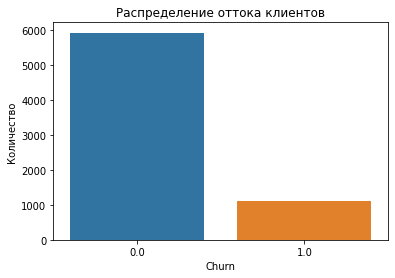

In [42]:
sns.countplot(x='Churn', data=df)
plt.xlabel('Сhurn')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов')
plt.show()

Имеется дисбаланс классов целевой переменной

In [43]:
#признаками будут являться все, кроме 'Churn',поэтому удалим этот столбец
features = df.drop(['Churn'], axis=1)
#целевой признак - 'Churn',выберем его
target = df['Churn']

#отделим 50% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=170723) 

In [44]:
#размер тренировочной выборки
features_train.shape

(5274, 18)

In [45]:
#размер тестовой выборки
features_test.shape

(1758, 18)

In [46]:
df.head(5)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,time_with_company_days
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,unknown,0.0,31
1,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0.0,1036
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0.0,123
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,unknown,0.0,1371
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0.0,153


In [47]:
df.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
       'Churn', 'time_with_company_days'],
      dtype='object')

In [48]:
categorical_columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines']

In [49]:
numeric=['time_with_company_days', 'MonthlyCharges',
       'TotalCharges']

In [50]:
#масштабируем численные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
scaler.fit(features_test[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 

/tmp/ipykernel_240/1505306666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_240/1505306666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [51]:
#так как в датасете представлены как численные, так категоривальные признаки, то нам необходимо привести данные к численные значениям
encoder = OneHotEncoder(drop='first', handle_unknown='error')
encoder.fit(features_train[categorical_columns])
new_cols = encoder.get_feature_names(categorical_columns)
features_train_encoded = pd.DataFrame(encoder.transform(features_train[categorical_columns]).toarray(),
                                      columns=new_cols, index=features_train.index)

features_train_ohe = pd.concat([features_train_encoded, features_train[numeric]], axis=1)

In [52]:

features_train_ohe.head()

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,TechSupport_unknown,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_Yes,StreamingMovies_unknown,MultipleLines_Yes,MultipleLines_unknown,time_with_company_days,MonthlyCharges,TotalCharges
2308,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.883862,1.293530,2.773425
4142,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.703560,-0.170970,0.904905
6001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.266992,-1.351859,-0.989635
6408,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.800571,1.354897,1.541274
1647,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.773378,0.459279,-0.544538


In [53]:
features_test_encoded = pd.DataFrame(encoder.transform(features_test[categorical_columns]).toarray(),
                                      columns=new_cols, index=features_test.index)

features_test_ohe = pd.concat([features_test_encoded, features_test[numeric]], axis=1)

In [54]:
features_test_ohe.head(5)

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,TechSupport_unknown,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_Yes,StreamingMovies_unknown,MultipleLines_Yes,MultipleLines_unknown,time_with_company_days,MonthlyCharges,TotalCharges
575,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.846386,0.510694,0.919689
1787,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.577410,1.311774,1.076603
3865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.266992,-1.381713,-0.990209
5512,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.904909,-0.343460,-0.768221
1695,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.118317,0.167374,0.794000


Вывод:

Определены цели и поставлены дальнейшие задачи;

Данные подготовлены и изучены;

Объеденены таблицы в одну общую;

Проведен исследовательский анализ данных;

Изменены необходимые типы данных;

Построены графики, выявлены зависимости;

Данные разделены на тренировочную и тестовую;


3  Обучение модели 

Логистическая регрессия

In [55]:
#обучим модель логистической регрессии
model = LogisticRegression(random_state=170723)
score = 'roc_auc'
cv_scores_roc_auc = cross_val_score(model, features_train_ohe, target_train, cv=5, scoring=score)
print("Средняя ROC AUC на логистической регресии:", cv_scores_roc_auc.mean())

Средняя ROC AUC на логистической регресии: 0.7612038386041918


ROC AUC на логистической регресии: 0.76

Модель случайного леса

In [56]:
model_forest = RandomForestClassifier(random_state=170723)

param_grid = {
    'n_estimators': [100, 3000]
}

grid_search = GridSearchCV(model_forest, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=10, n_jobs=-1)
grid_search.fit(features_train_ohe, target_train)

best_params = grid_search.best_params_

best_model = RandomForestClassifier(random_state=170723, **best_params)
cv_scores_roc_auc = cross_val_score(best_model, features_train_ohe, target_train, cv=3, scoring='roc_auc')

print("Средняя ROC AUC на случайном лесе:", cv_scores_roc_auc.mean())

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START n_estimators=100............................................
[CV 1/3; 1/2] END ..........................n_estimators=100; total time=   0.5s
[CV 2/3; 1/2] START n_estimators=100............................................
[CV 2/3; 1/2] END ..........................n_estimators=100; total time=   0.4s
[CV 3/3; 1/2] START n_estimators=100............................................
[CV 3/3; 1/2] END ..........................n_estimators=100; total time=   0.4s
[CV 1/3; 2/2] START n_estimators=3000...........................................
[CV 1/3; 2/2] END .........................n_estimators=3000; total time=  12.3s
[CV 2/3; 2/2] START n_estimators=3000...........................................
[CV 2/3; 2/2] END .........................n_estimators=3000; total time=  11.9s
[CV 3/3; 2/2] START n_estimators=3000...........................................
[CV 3/3; 2/2] END .........................n_estim

Средняя ROC AUC на модели случайного леса: 0.81

Модель CatBoostClassifier

In [57]:
param_grid = {
    'iterations': [100, 500],
    'learning_rate': [0.1, 0.01]
}

model_cat = CatBoostClassifier(random_seed=170723)

grid_search = GridSearchCV(model_cat, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=10, n_jobs=-1)
grid_search.fit(features_train_ohe, target_train)

best_params = grid_search.best_params_

best_model = CatBoostClassifier(random_seed=170723, **best_params)
cv_scores_roc_auc = cross_val_score(best_model, features_train_ohe, target_train, cv=3, scoring='roc_auc')

print("Средняя ROC AUC на CatBoost:", cv_scores_roc_auc.mean())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START iterations=100, learning_rate=0.1...........................
0:	learn: 0.6192028	total: 50.3ms	remaining: 4.98s
1:	learn: 0.5554744	total: 53.3ms	remaining: 2.61s
2:	learn: 0.5203139	total: 54.6ms	remaining: 1.76s
3:	learn: 0.4885414	total: 55.7ms	remaining: 1.33s
4:	learn: 0.4567690	total: 58.4ms	remaining: 1.11s
5:	learn: 0.4345538	total: 61.2ms	remaining: 959ms
6:	learn: 0.4157937	total: 64ms	remaining: 850ms
7:	learn: 0.4008642	total: 66.7ms	remaining: 767ms
8:	learn: 0.3861712	total: 69.4ms	remaining: 702ms
9:	learn: 0.3746748	total: 72.1ms	remaining: 649ms
10:	learn: 0.3656963	total: 75ms	remaining: 607ms
11:	learn: 0.3580149	total: 78.1ms	remaining: 573ms
12:	learn: 0.3512875	total: 80.7ms	remaining: 540ms
13:	learn: 0.3446820	total: 83.5ms	remaining: 513ms
14:	learn: 0.3399061	total: 86.3ms	remaining: 489ms
15:	learn: 0.3350800	total: 88.9ms	remaining: 467ms
16:	learn: 0.3305683	total: 91.4ms	remain

Средняя ROC AUC на CatBoost: 0.89

Вывод:

Наилучшая модель CatBoost

Средняя ROC AUC на CatBoost: 0.89

Наихудшая логистическая регрессия

4  Тестирование модели



In [58]:
best_model.fit(features_train_ohe, target_train)
probabilities = best_model.predict_proba(features_test_ohe)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target_test, probabilities_one))

0:	learn: 0.6129116	total: 3.42ms	remaining: 1.71s
1:	learn: 0.5539682	total: 6.64ms	remaining: 1.65s
2:	learn: 0.5192773	total: 8.39ms	remaining: 1.39s
3:	learn: 0.4836748	total: 11.4ms	remaining: 1.41s
4:	learn: 0.4556654	total: 14.3ms	remaining: 1.41s
5:	learn: 0.4295505	total: 17.4ms	remaining: 1.43s
6:	learn: 0.4162598	total: 20.4ms	remaining: 1.44s
7:	learn: 0.4025745	total: 23.3ms	remaining: 1.43s
8:	learn: 0.3911198	total: 26.4ms	remaining: 1.44s
9:	learn: 0.3825903	total: 29.3ms	remaining: 1.43s
10:	learn: 0.3717300	total: 32.2ms	remaining: 1.43s
11:	learn: 0.3654257	total: 35.5ms	remaining: 1.44s
12:	learn: 0.3589871	total: 38.8ms	remaining: 1.45s
13:	learn: 0.3515696	total: 41.9ms	remaining: 1.45s
14:	learn: 0.3465257	total: 45.1ms	remaining: 1.46s
15:	learn: 0.3421369	total: 48.3ms	remaining: 1.46s
16:	learn: 0.3379673	total: 51.7ms	remaining: 1.47s
17:	learn: 0.3347889	total: 54.8ms	remaining: 1.47s
18:	learn: 0.3328805	total: 57.7ms	remaining: 1.46s
19:	learn: 0.3295916	t

ROC AUC на CatBoost на тестовой выборке = 0.92

In [59]:
#исследуем ROC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) 

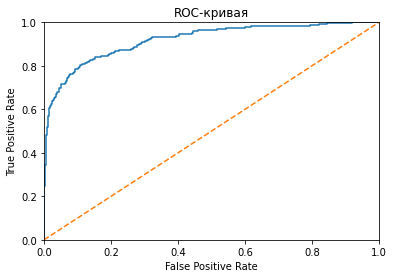

In [60]:
plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Построена ROC-кривая

ROC-AUC = 0.92, то есть метрика лучше, чем у случайной модели (0.5) и близка к идеальной (1).

Анализ важности признаков

In [61]:
feature_importance = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': features_train_ohe.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

Feature Importance:
                                  Feature  Importance
26                 time_with_company_days   43.354507
27                         MonthlyCharges   10.877507
28                           TotalCharges   10.470756
8                             Partner_Yes    4.334525
1                           Type_Two year    4.237966
24                      MultipleLines_Yes    2.661216
0                           Type_One year    2.648811
9                          Dependents_Yes    2.621314
5              PaymentMethod_Mailed check    2.293220
14                       OnlineBackup_Yes    2.092905
16                   DeviceProtection_Yes    1.896936
2                    PaperlessBilling_Yes    1.695354
3   PaymentMethod_Credit card (automatic)    1.692982
22                    StreamingMovies_Yes    1.482502
7                         SeniorCitizen_1    1.404812
6                             gender_Male    1.288002
4          PaymentMethod_Electronic check    1.217741
18      

Наиболее важными признаками являются

- time_with_company_days  - количество дней, проведенное клиентов с оператором связи

- MonthlyCharges - ежемесячные траты на услуги 

- TotalCharges - общие траты на услуги 


In [62]:
predictions = best_model.predict(features_test_ohe)
confusion_matrix = confusion_matrix(target_test, predictions)

print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[1466   19]
 [ 118  155]]


In [63]:
print(best_params)

{'iterations': 500, 'learning_rate': 0.1}


5 Проверка на случайной модели

In [64]:
#проверим случайную модель 
dummy_model = DummyClassifier(strategy='most_frequent', constant=1)
dummy_model.fit(features_train_ohe, target_train)
predictions_dummy= dummy_model.predict(target_test)
roc_auc_dummy=roc_auc_score(target_test,predictions_dummy)
print('Roc-auc случайной модели', roc_auc_dummy)

Roc-auc случайной модели 0.5


Общий вывод

Нам удалось достигнуть цели проекта:

    спрогнозировать, уйдёт клиент из компании «Ниединогоразрыва.ком» или нет,
    
    определить факторы, которые влияют на отток клиентов,
    
    достичь необходимой метрики roc-auc 0.92

Проведен исследовательский анализ данных, проведено объединение таблиц, измен тип данных на корректный, добавлены новые признаки и определен целевой признак.

Данные визуализированные и сделан анализ на мультиколлинеарность, выявлены следующие зависимости

Высокая корреляция между общими тратами на услуги и временем, проведенным в компании, но это логично, чем дольше в компании, тем больше денег уплачено. Так же имеется зависимость ежемесечных и общих трат, очевидно, чем больше ежемесячные траты, тем больше общие.

Выявлена высока корреляция между услугами интернета, онлайн безопасностью, защитой, поддержкой, подпиской на тв и фильмы и ежемесячными тратами, самая высокая между InternetService. Так же имеется замисимость этих признаков к типу тарифа.
В том числе, новый признак 'длительность клиента в компании' имеет высокую корреляцию с общими издержками и типом, использованного тарифа.

Наибольше количество пользователей используют 
- тариф с оплатой месяц за месяцем
-электронный платежный документ
-способ оплаты чаще электронный чек, далее чек на эмейл

Распределние пользователей по полу почти одинаковое.

Большинство пользователей не имеют пенсионного статуса, имеют только 16.2%

Распределние по наличию супруга(и) почти одинаковое.

У 70% имеются иждевенцы.

Большинство использует услуги интернета.

Наличие возможности ведения параллельных звонков используют только 42% пользователей.

Имеется дисбаланс классов целевой переменной

Данные разделены на обучающие и тестовые.

Проведено кодирование и масштабирование признаков

Обучены следующие модели
-Логистическая регрессия
-Модель случайного леса
-Модель CatBoostClassifier

Наилучшая модель CatBoost

Средняя ROC AUC на CatBoost: 0.89

Наихудшая логистическая регрессия

ROC AUC на CatBoost на тестовой выборке = 0.92, необходимая метрика достигнута

Построена ROC-кривая

Проведен анализ важности признаков



Вопросы:
    
Какие пункты плана были выполнены, а какие — нет. Почему?

Проведен исследовательский анализ данных, проведено объединение таблиц, измен тип данных на корректный, добавлены новые признаки и определен целевой признак.

Данные визуализированные и сделан анализ на мультиколлинеарность, выявлены следующие зависимости

Проведен анализ важности признаков

Данные разделены на обучающие и тестовые.

Проведено кодирование и масштабирование признаков

Выбрана наилучшая модель

Какие трудности возникли и как вы их преодолели?

Особый трудностей не возникло

Какие ключевые шаги в решении задачи вы выделили?

EDA

Обучение модели

Выбор лучшей модели

Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?

Использованые все признаки, кроме удаленных - время начала, время окончания, индентифакатор покупателя

Изменен тип данных на корректный, добавлены новые признаки и определен целевой признак.

Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?


 CatBoost ROC AUC c лучшими гиперпараметрами 'iterations': 500, 'learning_rate': 0.1 = 0.92
